INGRESE EL TAMAÑO DE PASO 'h': 0.025
 xi  |      u1[i]~y1(xi)       |      v1[i]~y2(xi)       | yi=Sol. S. lineal
-------------------------------------------------------------------------------------------------
0.0  |           1.0           |           0.0           |       1.0      
0.02 |   1.0000052083333333    |  0.025000065104166667   | 0.9747323187452338
0.05 |     1.0000385419477     |   0.0500009375044827    | 0.9494919466653685
0.08 |   1.0001312535075209    |   0.07500493498712224   | 0.9243077933447637
0.1  |   1.0003208544162399    |   0.10001635492468419   | 0.8992130259172482
0.12 |   1.0006386238481797    |   0.1250406938321439    | 0.874233367058971
0.15 |   1.0011096196560898    |   0.15008428414406036   | 0.8493874730825751
0.18 |   1.0017652013758063    |   0.1751557032708454    | 0.8246980325086257
0.2  |    1.002643058620188    |   0.2002661425948007    | 0.8001914214366739
0.22 |    1.003774719416676    |   0.22542738008109423   | 0.7758872613966368
0.25 |   1.0

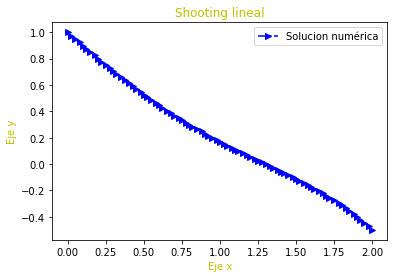

El tiempo de ejecucion en segundos fue: 0.27676916122436523


In [ ]:
"problema 1.a) metodo de shooting lineal"

#IMPORTANDO LIBRERIAS
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import sin, cos
from sympy import log
from time import time


#PROCEDEMOS A DEFINIR LAS FUNCIONES CORRESPONDIENTES DE y''(x) = p(x)y'(x) + q(x)y(x) + r(x

def p(x):
    ec = 0  #AQUI SE INGRESA LA FUNCION PARA p(x)
    return ec
def q(x):
    ec = 2*x  #AQUI SE INGRESA LA FUNCION PARA q(x)
    return ec
def r(x):
    ec = 0  #AQUI SE INGRESA LA FUNCION PARA r(x)
    return ec

#INICIALIZACION DE VARIABLES Y PARAMETROS

h = float(input("INGRESE EL TAMAÑO DE PASO 'h': ")) #AQUI SE INGRESA EL VALOR DEL TAMAÑO DE PASO h
tiempo_inicial = time()                       # inicio conteo de tiempo
a = 0 # Xinicial
b = 2 # Xfinal
N = int((b-a)/h) #'N' ES EL NUMERO DE INTERVALOS 
n = int((b-a)/h + 1) #'n' ES EL TAMAÑO O LONGITUD DE LOS ARREGLOS O VECTORES O MATRICES 1xn
x = np.zeros(n) #VECTOR x DE 1xn COMPLETADOS DE CEROS
u1 = np.zeros(n) #VECTOR u1 DE 1xn COMPLETADOS DE CEROS
u2 = np.zeros(n) #VECTOR u2 DE 1xn COMPLETADOS DE CEROS
v1 = np.zeros(n) #VECTOR v1 DE 1xn COMPLETADOS DE CEROS
v2 = np.zeros(n) #VECTOR v2 DE 1xn COMPLETADOS DE CEROS
w = np.zeros(n) #VECTOR w DE 1xn COMPLETADOS DE CEROS
z = np.zeros(n) #VECTOR z DE 1xn COMPLETADOS DE CEROS
z4 = np.zeros(n) #VECTOR z4 DE 1xn COMPLETADOS DE CEROS
y = np.zeros(n) #VECTOR y DE 1xn COMPLETADOS DE CEROS
dy = np.zeros(n) #VECTOR dy DE 1xn COMPLETADOS DE CEROS (Derivada de y)
u1[0]=1 # u1inicial
u2[0]=0 # u2inicial
v1[0]=0 # v1inicial
v2[0]=1 # v2inicial


#PROCEDEMOS A FORMAR UNA TABLA CON LOS RESULTADOS OBTENIDOS QUE SE MOSTRARA EN PANTALLA"

print('{:^4} | {:^23} | {:^23} | {:^15}'.format('xi','u1[i]~y1(xi)','v1[i]~y2(xi)','yi=Sol. S. lineal')) #TITULO MOSTRADO EN PANTALLA
print("-------------------------------------------------------------------------------------------------")
"PROCEDEMOS A USAR LA ESTRUCTURA 'FOR' PARA REPITIR LOS CALCULOS A OBTENER"

#INICIO DE LA ESTRUCTURA FOR CON EL METODO SHOOTING LINEAL"
for i in np.arange(0,N): 
    
    x[i]=round(a + i*h,2)
    k11=h*u2[i]
    k12=h*(p(x[i])*u2[i] + q(x[i])*u1[i] + r(x[i]))
    k21=h*(u2[i] + 0.5*k12)
    k22=h*(p(x[i]+h/2)*(u2[i]+0.5*k12) + q(x[i]+h/2)*(u1[i]+0.5*k11) + r(x[i]+h/2))
    k31=h*(u2[i] + 0.5*k22)
    k32=h*(p(x[i]+h/2)*(u2[i]+0.5*k22) + q(x[i]+h/2)*(u1[i]+0.5*k21) + r(x[i]+h/2))
    k41=h*(u2[i] + k32)
    k42=h*(p(x[i]+h)*(u2[i]+k32) + q(x[i]+h)*(u1[i]+k31) + r(x[i]+h))
    u1[i+1]=u1[i] + (1/6)*(k11 + 2*k21 + 2*k31 + k41)
    u2[i+1]=u2[i] + (1/6)*(k12 + 2*k22 + 2*k32 + k42)
    kp11=h*v2[i]
    kp12=h*(p(x[i])*v2[i] + q(x[i])*v1[i])
    kp21=h*(v2[i] + 0.5*kp12)
    kp22=h*(p(x[i]+h/2)*(v2[i]+0.5*kp12) + q(x[i]+h/2)*(v1[i]+0.5*kp11))
    kp31=h*(v2[i] + 0.5*kp22)
    kp32=h*(p(x[i]+h/2)*(v2[i]+0.5*kp22) + q(x[i]+h/2)*(v1[i]+0.5*kp21))
    kp41=h*(v2[i] + kp32)
    kp42=h*(p(x[i]+h)*(v2[i]+kp32) + q(x[i]+h)*(v1[i]+kp31))
    v1[i+1]=v1[i] + (1/6)*(kp11 + 2*kp21 + 2*kp31 + kp41)
    v2[i+1]=v2[i] + (1/6)*(kp12 + 2*kp22 + 2*kp32 + kp42)
w10=1
w20=(-0.5-u1[N])/v1[N]

#INICIO DE LA ESTRUCTURA FOR
for i in np.arange(0,n): 
    x[i]=round(a + i*h,2)
    y[i]=u1[i] + w20*v1[i]
    dy[i]=u2[i] + w20*v2[i]
    #w[i]=solucionexacta(x[i],y[i]) #'w' ES LA SOLUCION EXACTA DE LA FUNCION
    #z4[i]=abs((w[i]-y[i])/w[i]) # z4 ES EL ERROR RELATIVO
    #z[i]=abs(w[i]-y[i]) #'z' ES EL ERROR ABSOLUTO DE LA FUNCION EN CADA PUNTO
    print('{:^4} | {:^23} | {:^23} | {:^15}'.format(x[i],u1[i],v1[i],y[i])) #VALORES EN x=i MOSTRADOS EN PANTALLA #FIN DE LA ESTRUCTURA FOR

#GRAFICOS   
plt.plot(x,y,marker='>', linestyle='-.',color='blue', label='Solucion numérica')
#plt.plot(x,w,marker='x', linestyle='--',color='red', label='Solucion analítica') 
plt.title('Shooting lineal', color = 'y') #MOSTRAR EL TITULO EN LA GRAFICA
plt.xlabel('Eje x', color = 'y')
plt.ylabel('Eje y', color = 'y')
plt.legend()
plt.show()

tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print ('El tiempo de ejecucion en segundos fue:',tiempo_ejecucion) # fin conteo de tiempo


